In [1]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install missingno
import missingno as msno 


In [2]:
# leer los datos de Licencias_Locales_202104.csv
licencias_pd = pd.read_csv('Licencias_Locales_202104.csv', delimiter=';')
licencias_pd.sample(10)

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,...,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,rotulo,ref_licencia,id_tipo_licencia,desc_tipo_licencia,id_tipo_situacion_licencia,desc_tipo_situacion_licencia,Fecha_Dec_Lic
115567,285001542,1,CENTRO,101,PALACIO,1,1016,16,"439553,6","4473789,53",...,SIN AGRUPACION,PB,NaN,RÓTULO NO INFORMADO,500/2012/04458,2,Licencia Urbanística,2,Concedida,26/09/2012
72130,280002990,4,SALAMANCA,404,GUINDALERA,4,4065,65,"443133,58","4475879,5",...,SIN AGRUPACION,PB,NaN,FRUSTERIA FRESCA Y ECONOMICA,500/2018/04245,4,Transmisión de licencia Urbanística,5,Transmisión de Licencia Concedida,12/04/2018
14274,170001297,17,VILLAVERDE,1703,BUTARQUE,3,17047,47,"442062,53","4467279,5",...,SIN AGRUPACION,PB,NaN,ULTRAMARINOS A. NUEVO,112/2008/00319,4,Transmisión de licencia Urbanística,2,Concedida,18/02/2008
89988,280036581,7,CHAMBERI,702,ARAPILES,2,7042,42,"439933,6","4476076,54",...,SIN AGRUPACION,PB,NaN,RÓTULO NO INFORMADO,500/2017/12087,1,Declaración Responsable,3,Denegada,21/04/2020
82284,280020501,3,RETIRO,304,IBIZA,4,3066,66,"442633,58","4474716,51",...,SIN AGRUPACION,PB,NaN,FARMACIA,500/2019/13387,1,Declaración Responsable,2,Concedida,05/11/2019
78314,280011436,1,CENTRO,106,SOL,6,1118,118,"440445,59","4474485,53",...,SIN AGRUPACION,PB,NaN,LATA TAPA,500/2012/02247,2,Licencia Urbanística,2,Concedida,11/05/2012
4633,50001472,5,CHAMARTIN,504,HISPANOAMERICA,4,5064,64,"442212,59","4478143,52",...,SIN AGRUPACION,PB,NaN,HOSPITAL SAN RAFAEL,500/2014/11297,1,Declaración Responsable,1,En tramitación,24/11/2014
95074,280044994,9,MONCLOA-ARAVACA,904,VALDEZARZA,4,9064,64,"439782,62","4479543,55",...,SIN AGRUPACION,PB,NaN,CLINICA DENTAL,500/2018/00084,1,Declaración Responsable,1,En tramitación,03/01/2018
33458,270263641,8,FUENCARRAL-EL PARDO,806,VALVERDE,6,8120,120,"441169,62","4482835,55",...,SIN AGRUPACION,PB,NaN,PELUQUERIA UNISEX JM,500/2019/08125,1,Declaración Responsable,1,En tramitación,21/06/2019
113610,280073052,15,CIUDAD LINEAL,1505,SAN PASCUAL,5,15146,146,"444374,58","4476955,48",...,SIN AGRUPACION,PB,NaN,EL RINCON,500/2017/06369,4,Transmisión de licencia Urbanística,4,Tramitando Transmisión de Licencia,13/06/2017


In [3]:
# Dimensiones y tipos de datos del dataset

licencias_pd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132171 entries, 0 to 132170
Data columns (total 46 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   id_local                      132171 non-null  int64 
 1   id_distrito_local             132171 non-null  int64 
 2   desc_distrito_local           132171 non-null  object
 3   id_barrio_local               132171 non-null  int64 
 4   desc_barrio_local             132171 non-null  object
 5   cod_barrio_local              132171 non-null  int64 
 6   id_seccion_censal_local       132171 non-null  int64 
 7   desc_seccion_censal_local     132171 non-null  int64 
 8   coordenada_x_local            132171 non-null  object
 9   coordenada_y_local            132171 non-null  object
 10  id_tipo_acceso_local          132171 non-null  int64 
 11  desc_tipo_acceso_local        132171 non-null  object
 12  id_situacion_local            132171 non-null  int64 
 13 

In [4]:
# valores nulos
licencias_pd.isnull().sum()

id_local                             0
id_distrito_local                    0
desc_distrito_local                  0
id_barrio_local                      0
desc_barrio_local                    0
cod_barrio_local                     0
id_seccion_censal_local              0
desc_seccion_censal_local            0
coordenada_x_local                   0
coordenada_y_local                   0
id_tipo_acceso_local                 0
desc_tipo_acceso_local               0
id_situacion_local                   0
desc_situacion_local                 0
id_ndp_edificio                      0
id_clase_ndp_edificio                0
id_vial_edificio                     0
clase_vial_edificio                  0
desc_vial_edificio                   0
nom_edificio                         0
num_edificio                         0
cal_edificio                         0
secuencial_local_PC                  0
id_ndp_acceso                        0
id_clase_ndp_acceso                  0
id_vial_acceso           

In [5]:
# Mostar todas las columnas del dataset
pd.set_option('display.max_columns', None)
licencias_pd.describe(include='all')


,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,id_ndp_edificio,id_clase_ndp_edificio,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,nom_edificio,num_edificio,cal_edificio,secuencial_local_PC,id_ndp_acceso,id_clase_ndp_acceso,id_vial_acceso,clase_vial_acceso,desc_vial_acceso,nom_acceso,num_acceso,cal_acceso,coordenada_x_agrupacion,coordenada_y_agrupacion,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,rotulo,ref_licencia,id_tipo_licencia,desc_tipo_licencia,id_tipo_situacion_licencia,desc_tipo_situacion_licencia,Fecha_Dec_Lic
count,1.321710e+05,132171.000000,132171,132171.000000,132171,132171.000000,132171.000000,132171.000000,132171,132171,132171.000000,132171,132171.000000,132171,1.321710e+05,132171.0,1.321710e+05,132171,132171,132171,132171.000000,132171,132171.000000,1.321710e+05,132171.0,1.321710e+05,132171,132171,132171,132171.000000,132171,8174,8174,1.321710e+05,132171,132171.000000,132171,131859,8166,132171,132171,132171.000000,132171,132171.000000,132171,132171
unique,NaN,NaN,21,NaN,131,NaN,NaN,NaN,36370,46338,NaN,3,NaN,7,NaN,NaN,NaN,23,4999,2,NaN,27,NaN,NaN,NaN,NaN,23,5062,2,NaN,30,289,289,NaN,304,NaN,11,34,1285,47722,131180,NaN,5,NaN,7,5387
top,NaN,NaN,CENTRO,NaN,EMBAJADORES,NaN,NaN,NaN,0,0,NaN,Puerta Calle,NaN,Abierto,NaN,NaN,NaN,CALLE,ALCALA ...,NUM,NaN,,NaN,NaN,NaN,NaN,CALLE,ALCALA ...,NUM,NaN,,"440241,62","4481242,55",NaN,SIN AGRUPACION,NaN,SIN AGRUPACION,PB,0,RÓTULO NO INFORMADO,106/2009/00454,NaN,Declaración Responsable,NaN,En tramitación,01/01/1900
freq,NaN,NaN,15810,NaN,3587,NaN,NaN,NaN,4495,4495,NaN,123722,NaN,127639,NaN,NaN,NaN,108357,1958,132097,NaN,125955,NaN,NaN,NaN,NaN,107753,1937,132096,NaN,126025,454,454,NaN,123997,NaN,123997,128830,221,3097,9,NaN,47758,NaN,43013,11903
mean,2.504209e+08,8.853765,NaN,888.872763,NaN,3.496244,8924.097124,70.331926,NaN,NaN,0.961043,NaN,1.144222,NaN,1.359786e+07,1.0,5.578206e+06,NaN,NaN,NaN,43.645641,NaN,20.326864,1.427706e+07,1.0,5.612623e+06,NaN,NaN,NaN,43.994424,NaN,NaN,NaN,6.122581e+06,NaN,-0.639270,NaN,NaN,NaN,NaN,NaN,2.245303,NaN,2.136853,NaN,NaN
std,6.773607e+07,5.725470,NaN,572.527589,NaN,1.848652,5729.397065,47.777896,NaN,NaN,0.558647,NaN,0.856491,NaN,5.697392e+06,0.0,1.965596e+07,NaN,NaN,NaN,67.976607,NaN,34.918815,6.303585e+06,0.0,1.973392e+07,NaN,NaN,NaN,68.601839,NaN,NaN,NaN,2.384649e+07,NaN,1.885388,NaN,NaN,NaN,NaN,NaN,1.359586,NaN,1.429746,NaN,NaN
min,1.000001e+07,1.000000,NaN,101.000000,NaN,1.000000,1001.000000,1.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,1.100000e+07,1.0,1.270000e+02,NaN,NaN,NaN,1.000000,NaN,0.000000,1.100000e+07,1.0,1.270000e+02,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,-1.000000e+00,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,-1.000000,NaN,NaN
25%,2.702225e+08,4.000000,NaN,404.000000,NaN,2.000000,4061.000000,31.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,1.101969e+07,1.0,2.170000e+05,NaN,NaN,NaN,8.000000,NaN,10.000000,1.102078e+07,1.0,2.126000e+05,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,-1.000000e+00,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,2.705465e+08,8.000000,NaN,804.000000,NaN,3.000000,8086.000000,65.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,1.106279e+07,1.0,4.176000e+05,NaN,NaN,NaN,22.000000,NaN,10.000000,1.106898e+07,1.0,4.176000e+05,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,-1.000000e+00,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,2.000000,NaN,NaN
75%,2.800486e+08,13.000000,NaN,1305.000000,NaN,5.000000,13157.000000,103.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,1.112677e+07,1.0,6.353000e+05,NaN,NaN,NaN,52.000000,NaN,20.000000,1.113945e+07,1.0,6.351000e+05,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,-1.000000e+00,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,3.000000,NaN,NaN


<Axes: >

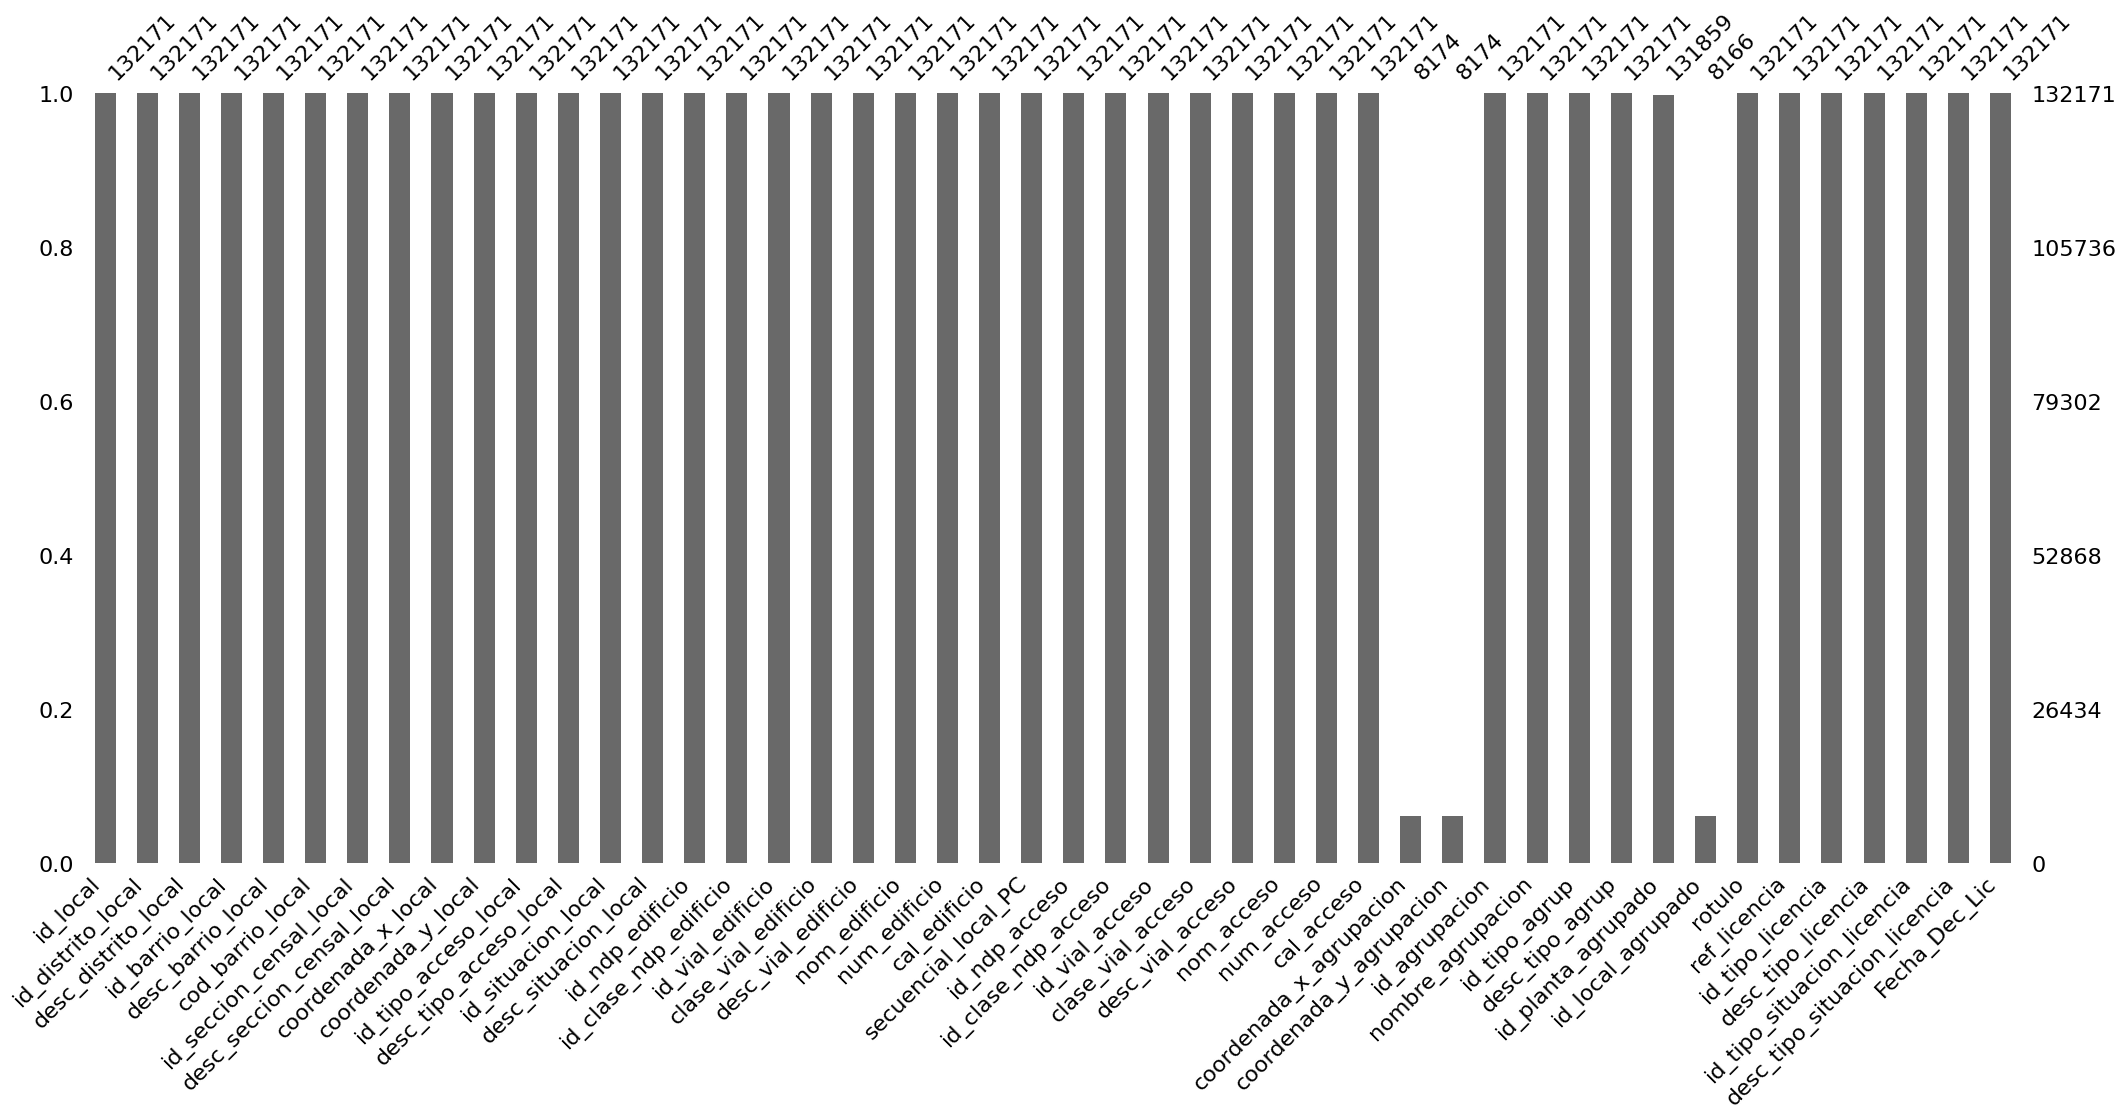

In [6]:
msno.bar(licencias_pd)

<Axes: >

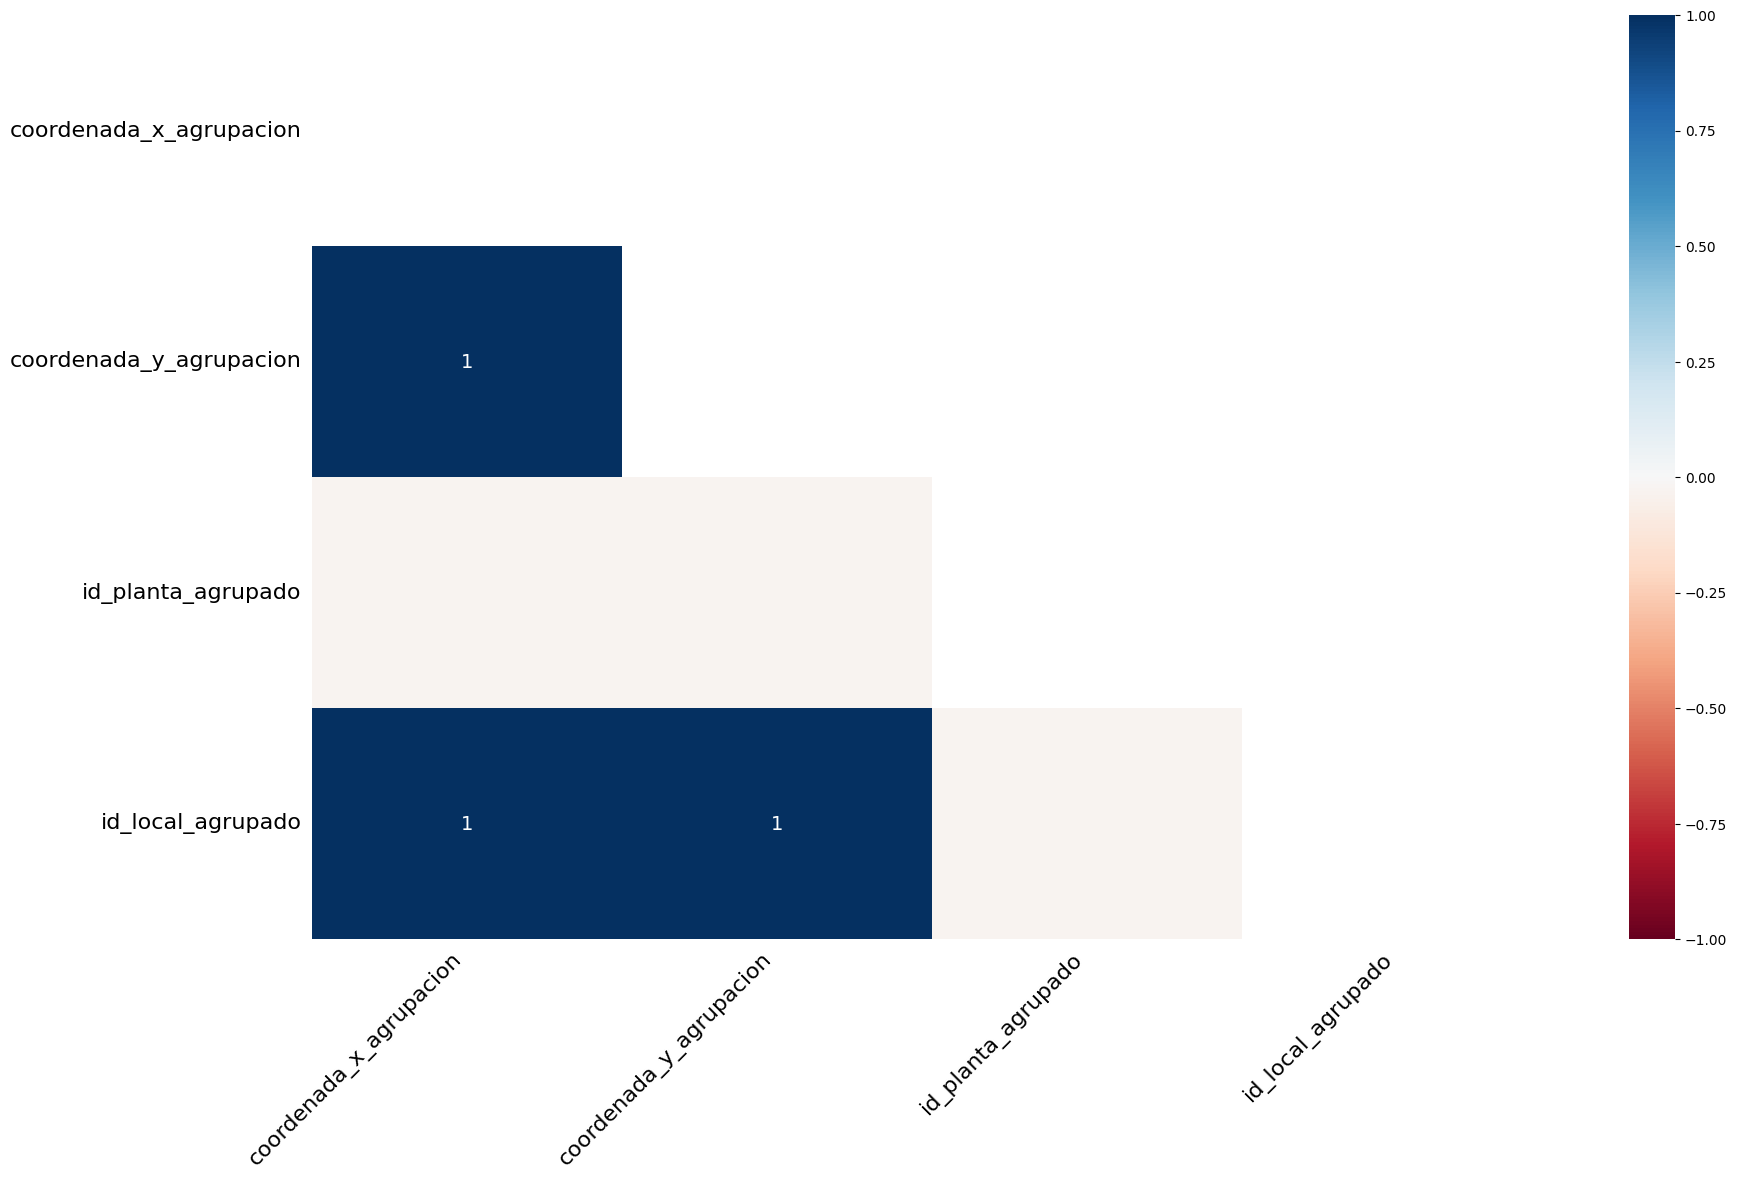

In [7]:
msno.heatmap(licencias_pd)

<Axes: >

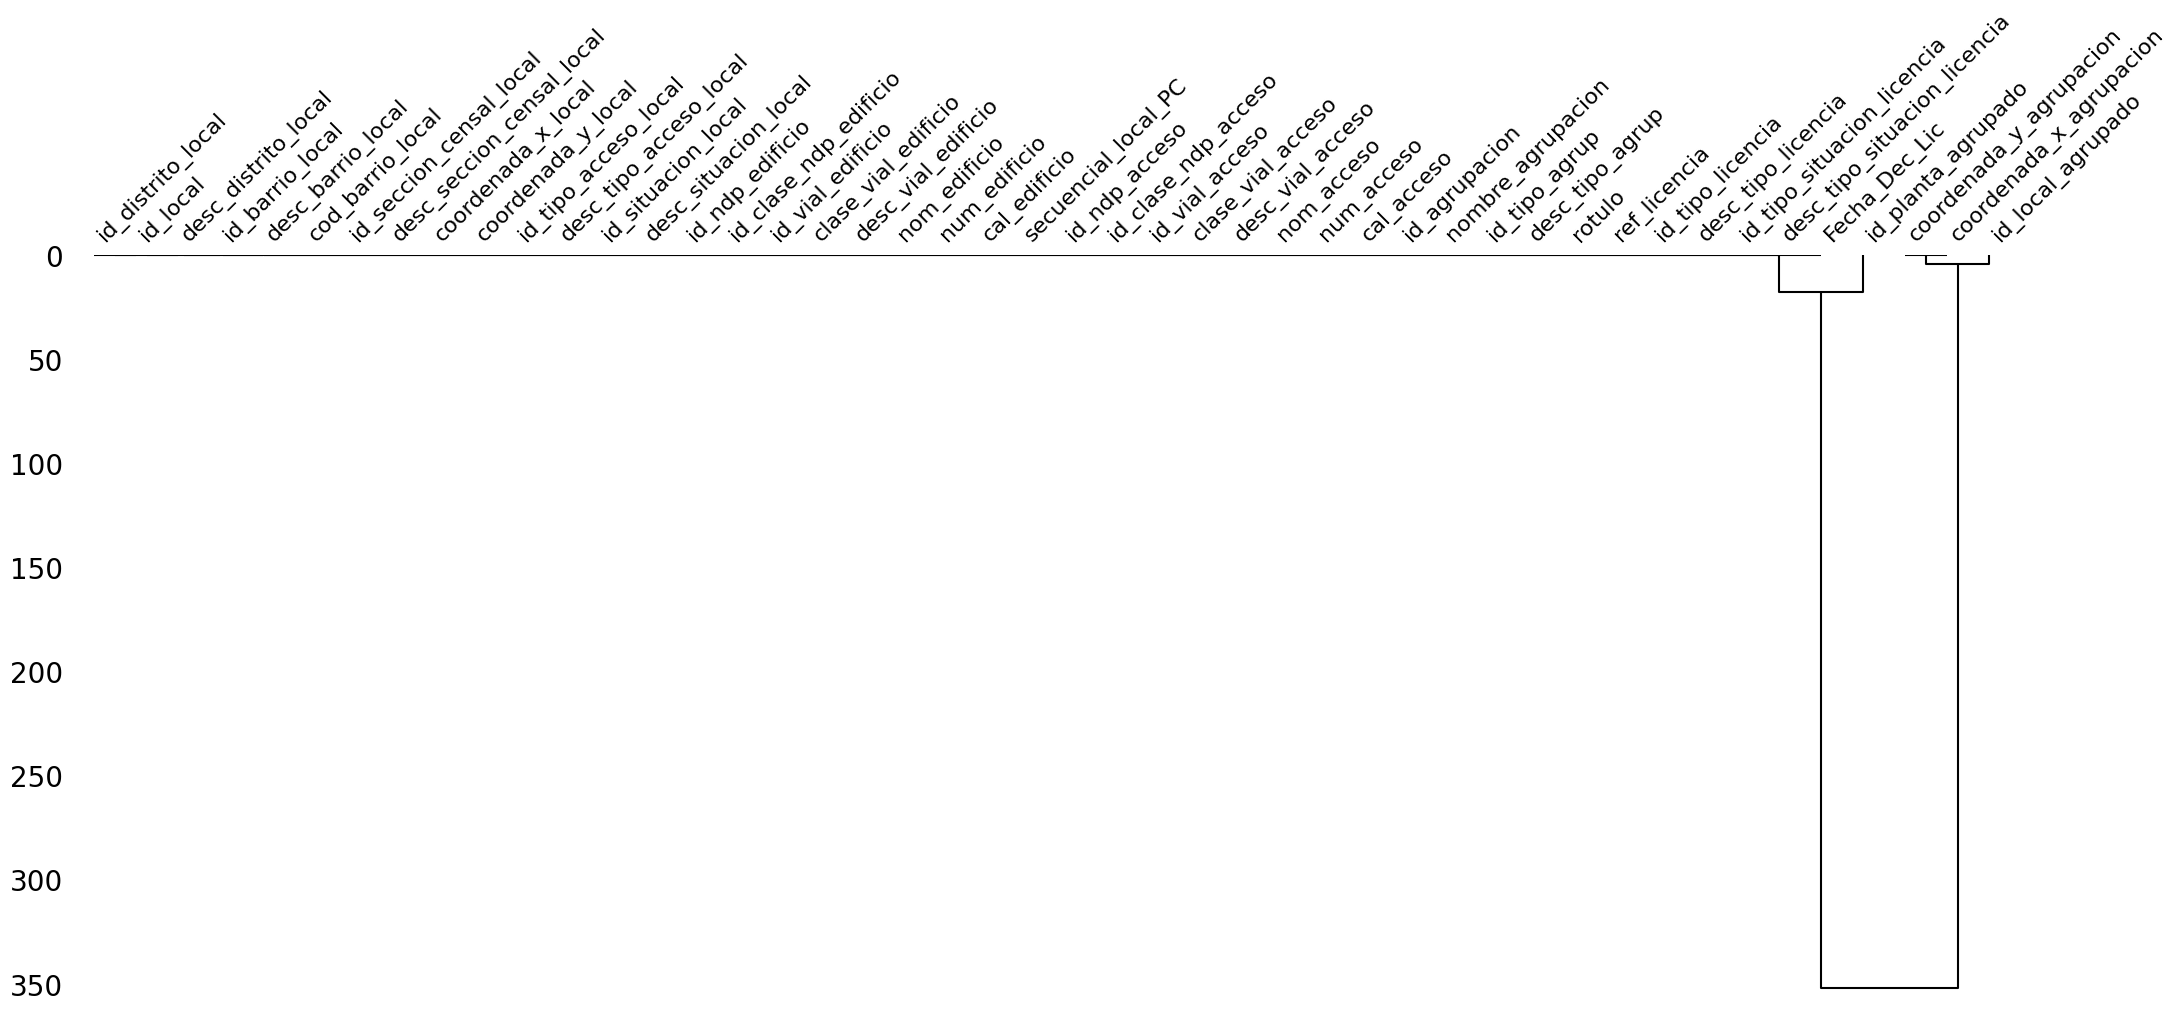

In [8]:
msno.dendrogram(licencias_pd)

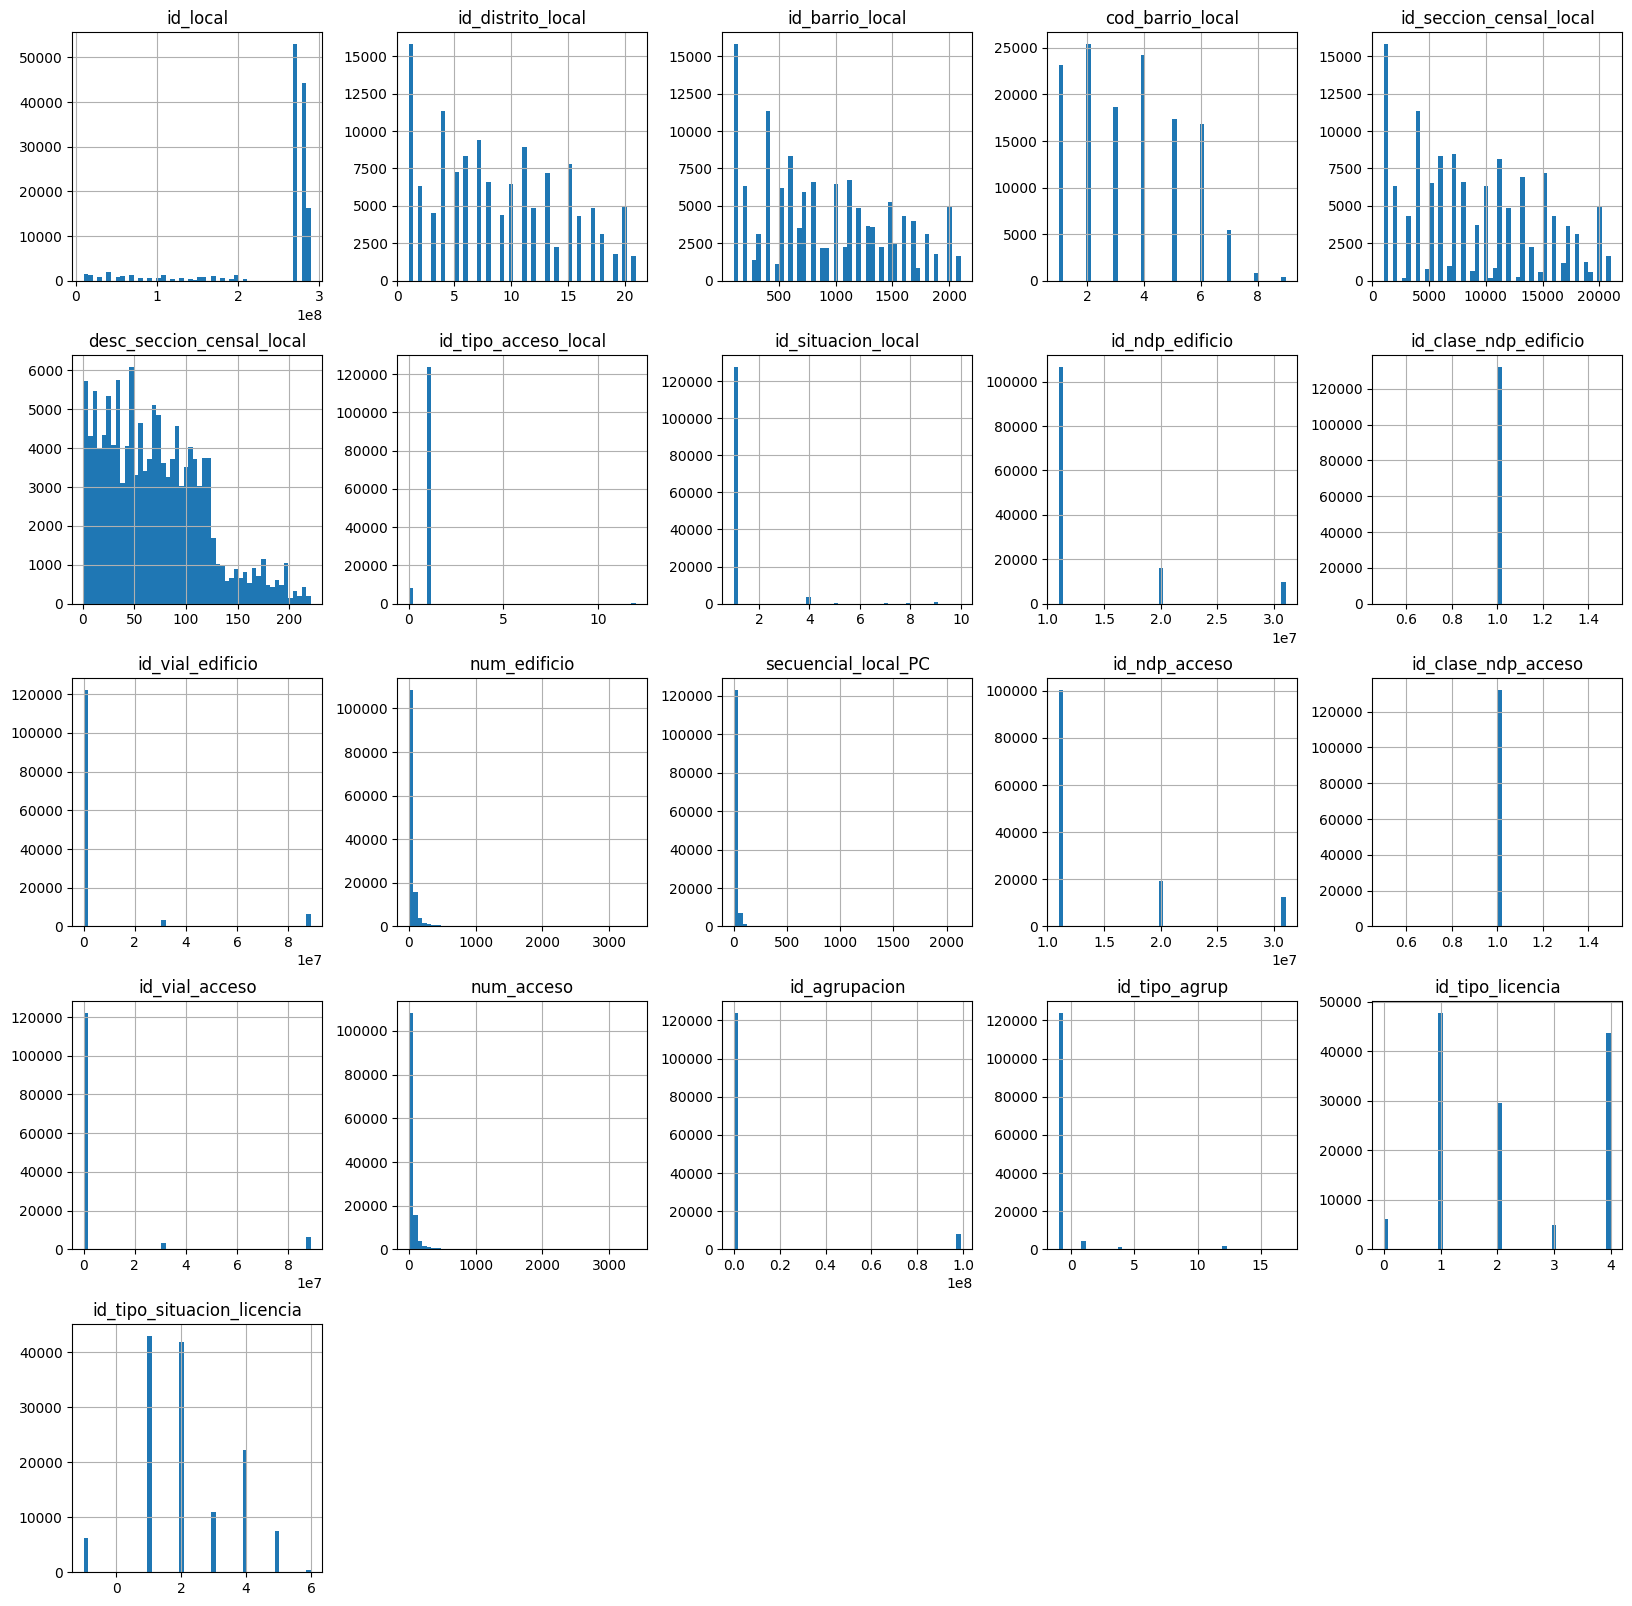

In [9]:
histograma = licencias_pd.hist(figsize=(20, 20), bins=50)


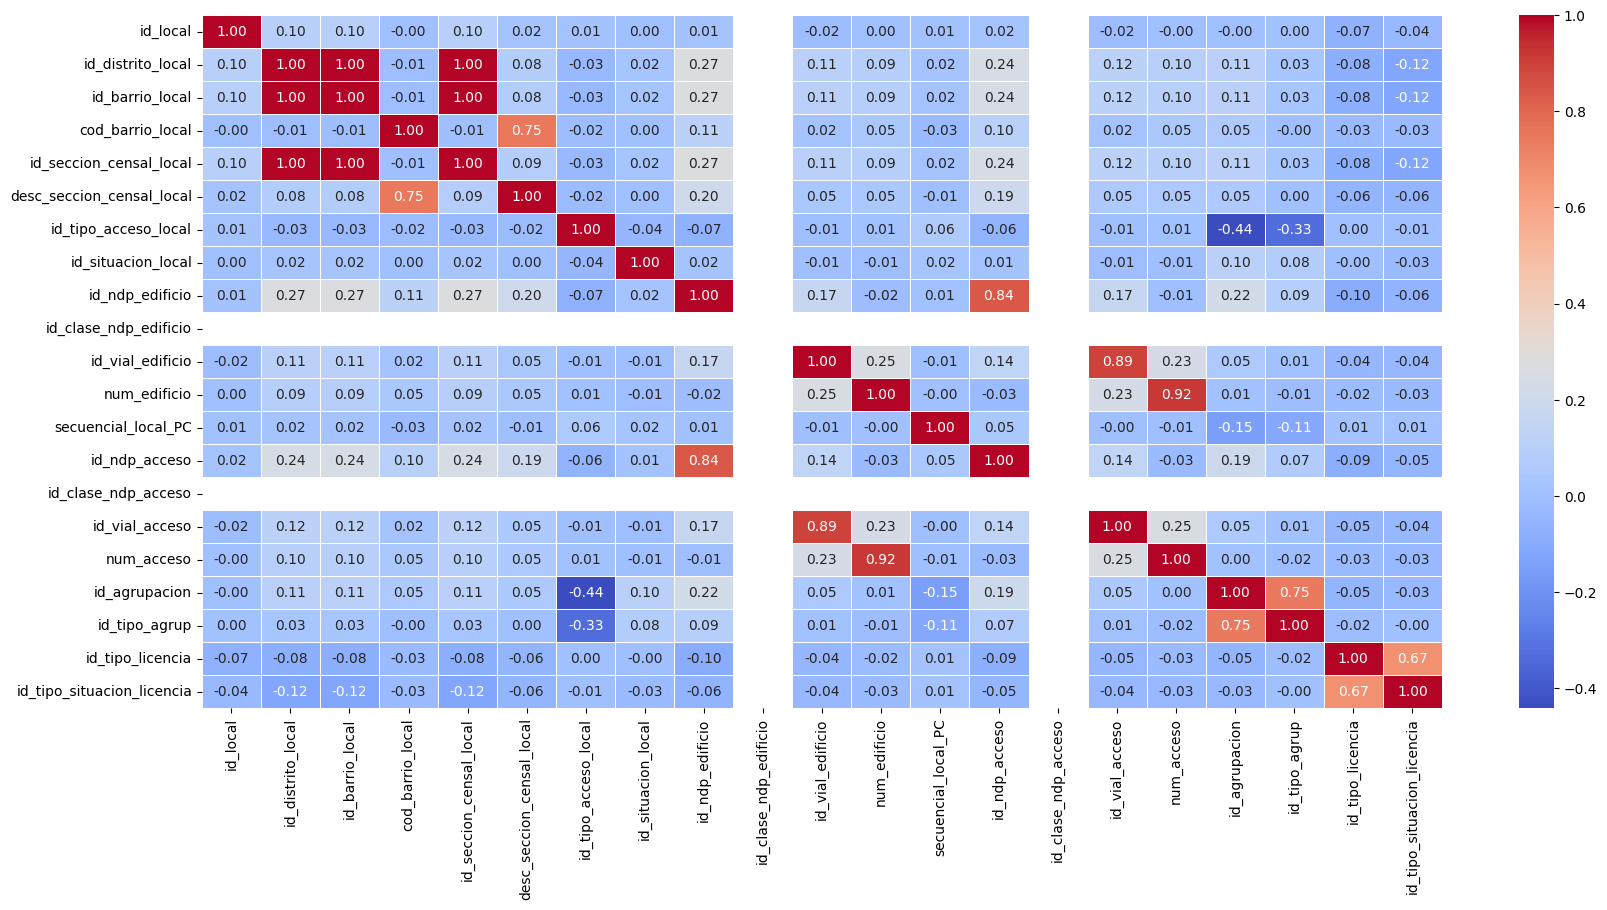

In [10]:
# Filtrar solo columnas numéricas del DataFrame
plt.figure(figsize=(20, 9))
df_numerico = licencias_pd.select_dtypes(include=['number'])
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidth=.5)
plt.show()

C:\Users\ansab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


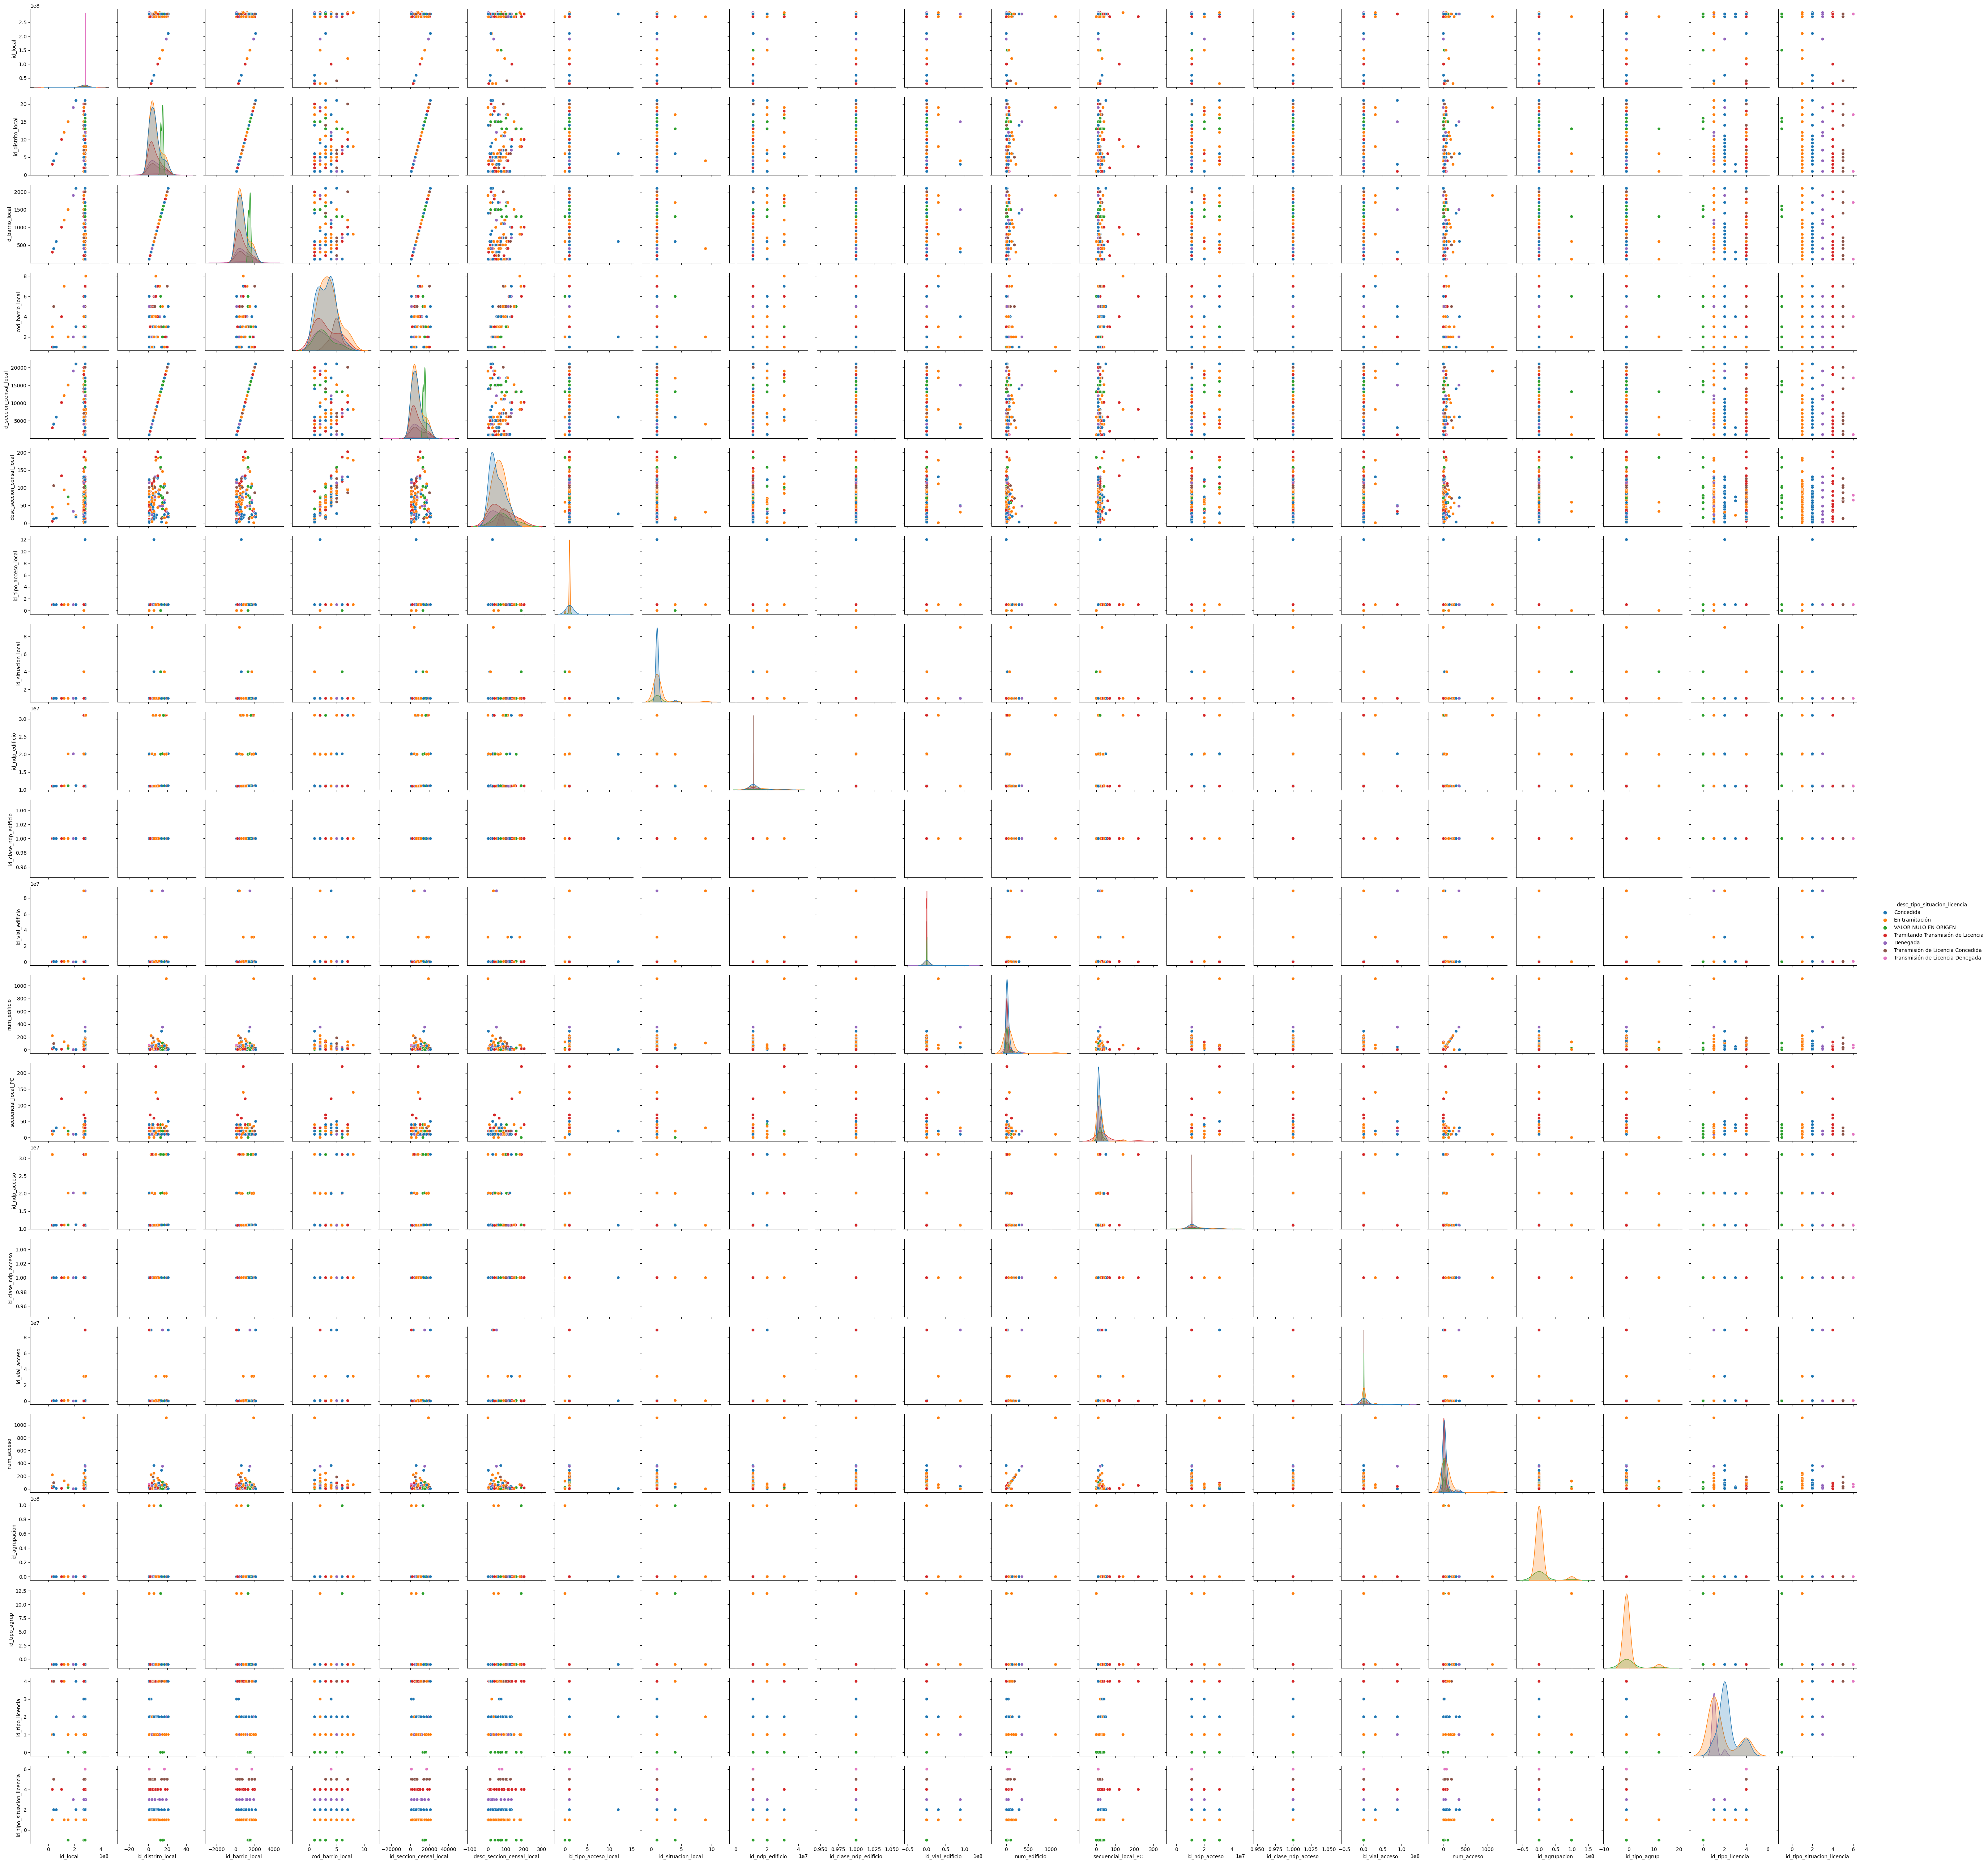

In [11]:
# Tomar una muestra aleatoria del 0.1% de los datos
sample_df = licencias_pd.sample(frac=0.001, random_state=1)

# Crear la matriz de gráficos de dispersión
sns.pairplot(sample_df, hue='desc_tipo_situacion_licencia')
plt.show()

In [12]:
# Eliminar columnas sin datos
licencias_pd_edit = licencias_pd.drop(['cod_barrio_local','id_seccion_censal_local','id_tipo_acceso_local','id_vial_edificio','id_vial_acceso'], axis=1)
# Eliminar columnas que no aportan información
licencias_pd_edit = licencias_pd_edit.drop(['id_clase_ndp_edificio','id_clase_ndp_acceso'], axis=1)
licencias_pd_edit.isnull().sum()[licencias_pd_edit.isnull().sum() > 0]

coordenada_x_agrupacion    123997
coordenada_y_agrupacion    123997
id_planta_agrupado            312
id_local_agrupado          124005
dtype: int64

In [13]:
# eliminar columnas 'agrupadas'
licencias_pd_edit = licencias_pd_edit.drop(['coordenada_x_agrupacion','coordenada_y_agrupacion','id_local_agrupado','id_planta_agrupado'], axis=1)


In [14]:
licencias_pd_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132171 entries, 0 to 132170
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   id_local                      132171 non-null  int64 
 1   id_distrito_local             132171 non-null  int64 
 2   desc_distrito_local           132171 non-null  object
 3   id_barrio_local               132171 non-null  int64 
 4   desc_barrio_local             132171 non-null  object
 5   desc_seccion_censal_local     132171 non-null  int64 
 6   coordenada_x_local            132171 non-null  object
 7   coordenada_y_local            132171 non-null  object
 8   desc_tipo_acceso_local        132171 non-null  object
 9   id_situacion_local            132171 non-null  int64 
 10  desc_situacion_local          132171 non-null  object
 11  id_ndp_edificio               132171 non-null  int64 
 12  clase_vial_edificio           132171 non-null  object
 13 